TypeError: Rectangle.__init__() takes 4 positional arguments but 5 were given

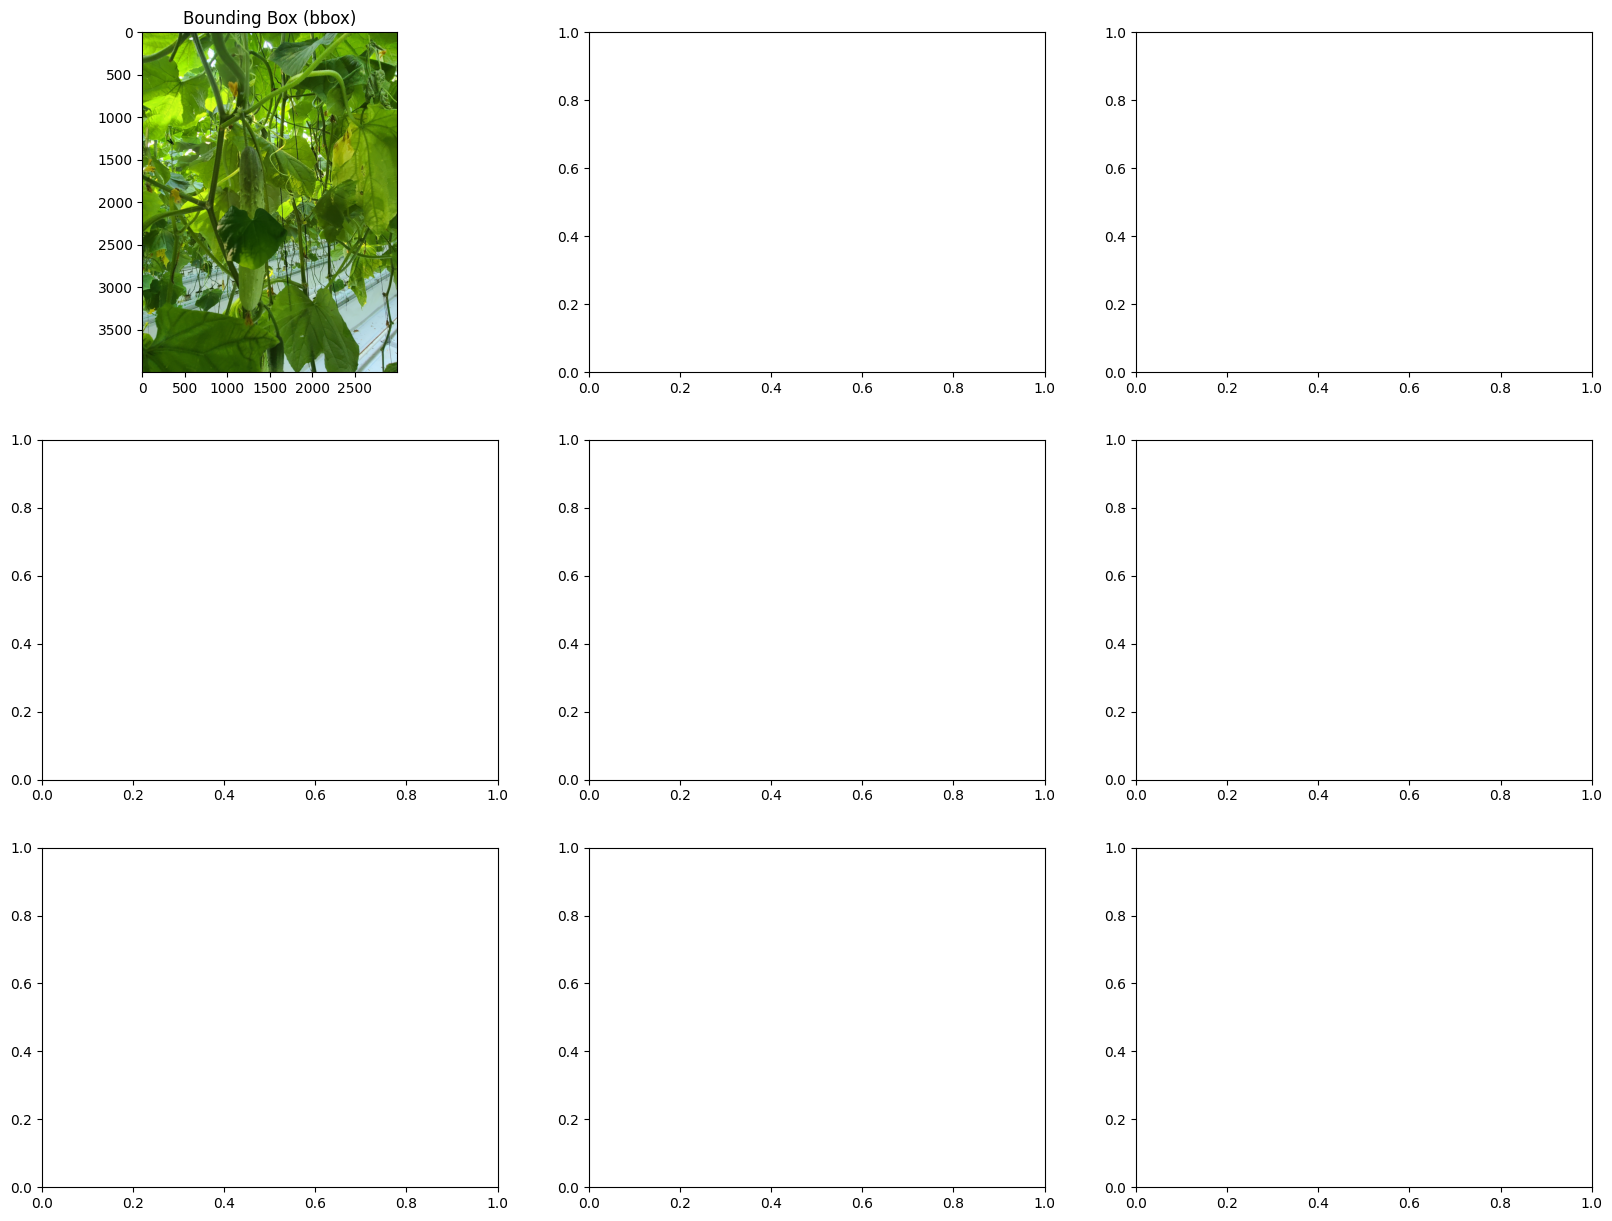

In [ ]:
import matplotlib.pyplot as plt
import cv2
import json
import numpy as np

def visualize_single_annotation(annotation, image_path):
    """
    한 개의 annotation의 다양한 요소를 플롯으로 나눠서 시각화.
    
    Args:
        annotation (dict): COCO annotation 정보.
        image_path (str): 이미지 파일 경로.
    """
    # 이미지 로드
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # 플롯 설정
    fig, axs = plt.subplots(3, 3, figsize=(20, 15))
    axs = axs.ravel()

    # 각 요소별 시각화
    elements = {
        "Bounding Box (bbox)": annotation.get("bbox", []),
        "Area": annotation.get("area", 0),
        "Segmentation": annotation.get("segmentation", []),
        "Visible BBox": annotation.get("visible_bbox", []),
        "Amodal BBox": annotation.get("amodal_bbox", []),
        "Amodal Segmentation": annotation.get("amodal_segm", []),
        "Visible Segmentation": annotation.get("visible_segm", []),
        "Occluder Segmentation": annotation.get("occluder_segm", [])
    }
    
    for i, (key, value) in enumerate(elements.items()):
        ax = axs[i]
        ax.imshow(image)
        ax.set_title(key)
        
        if key == "Area":
            ax.text(0.5, 0.5, f"Area: {value:.2f}", fontsize=16, color="red", ha="center", va="center")
            ax.axis("off")
        elif "bbox" in key.lower() and value:
            # COCO bbox는 [x_min, y_min, w, h] 형식
            if len(value) == 4:
                x_min, y_min, width, height = value
                rect = plt.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor="r", facecolor="none")
                ax.add_patch(rect)
        elif "Segmentation" in key and value:
            for polygon in value:
                polygon = np.array(polygon).reshape(-1, 2)
                ax.plot(polygon[:, 0], polygon[:, 1], linewidth=2)
        elif "BBox" in key and value:
            x_min, y_min, x_max, y_max = value  # Amodal/Visible BBox는 [x_min, y_min, x_max, y_max]
            rect = plt.Rectangle(
                (x_min, y_min), x_max - x_min, y_max - y_min, 
                linewidth=2, edgecolor="b", facecolor="none", label=key
            )
            ax.add_patch(rect)
            ax.legend()
        ax.axis("off")
    
    plt.tight_layout()
    plt.show()

# JSON 파일 로드
coco_json_path = "/home/knuvi/Desktop/song/cucumber-image/data/oi_seg/amodal_info6/dataset.json"
image_dir = "/home/knuvi/Desktop/song/cucumber-image/data/oi_seg/amodal_images6"

with open(coco_json_path, "r") as f:
    coco_json = json.load(f)

# 하나의 annotation 선택
selected_annotation = coco_json["annotations"][0]  # 첫 번째 annotation 선택
image_id = selected_annotation["image_id"]

# 이미지 경로 찾기
image_info = next(img for img in coco_json["images"] if img["id"] == image_id)
image_path = f"{image_dir}/{image_info['file_name']}"

# 시각화 호출
visualize_single_annotation(selected_annotation, image_path)


Generated BBox: [1138, 2151, 1456, 2881]


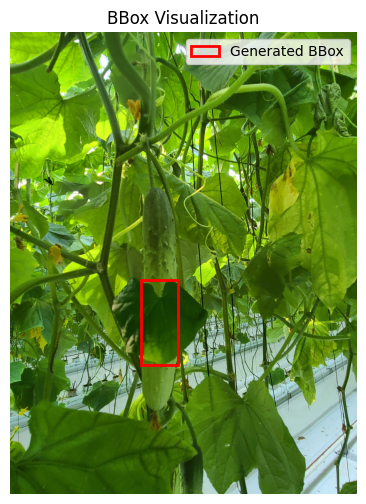

In [13]:
import sys
sys.path.append("/home/knuvi/Desktop/song/cucumber-image/")
from amodal_utils import get_bbox_from_mask
def test_bbox_generation(cucumber_image_path, cucumber_mask_path):
    """
    bbox 생성 검증을 위한 함수.
    - bbox 값을 출력하고, 시각적으로 확인.
    """
    # 이미지와 마스크 로드
    cucumber_image = cv2.imread(cucumber_image_path)
    cucumber_image = cv2.cvtColor(cucumber_image, cv2.COLOR_BGR2RGB)  # RGB로 변환
    cucumber_mask = cv2.imread(cucumber_mask_path, cv2.IMREAD_GRAYSCALE)

    # bbox 생성
    bbox = get_bbox_from_mask(cucumber_mask)
    print(f"Generated BBox: {bbox}")

    # bbox 시각화
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.imshow(cucumber_image)
    x_min, y_min, x_max, y_max = bbox

    # bbox 그리기
    rect = plt.Rectangle(
        (x_min, y_min), x_max - x_min, y_max - y_min,
        linewidth=2, edgecolor="r", facecolor="none", label="Generated BBox"
    )
    ax.add_patch(rect)
    ax.set_title("BBox Visualization")
    ax.axis("off")
    plt.legend()
    plt.show()


# 테스트할 파일 경로 설정
cucumber_image_path = "/home/knuvi/Desktop/song/cucumber-image/data/oi_seg/amodal_images5/oi_140_3_merged_000000.png"
cucumber_mask_path = "/home/knuvi/Desktop/song/cucumber-image/data/oi_seg/modal_masks5/oi_140_3_merged_000000_overlap_mask.png"

# 검증 실행
test_bbox_generation(cucumber_image_path, cucumber_mask_path)
